In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import warnings
warnings.filterwarnings(action='ignore')
#from tabulate import tabulate


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stroke.csv to stroke.csv


In [ ]:
#используется для загрузки данных из файла CSV с именем "stroke.csv" в переменную data с помощью библиотеки Pandas в Python.
#Когда вы вызываете data, вы просто просматриваете содержимое этой переменной, которая теперь содержит данные из файла CSV. Если вы хотите вывести содержимое данных в Jupyter Notebook или в консоли Python,
#достаточно вызвать переменную data после загрузки данных из CSV файла.

data = pd.read_csv('stroke.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

#### Data info

In [ ]:
from tabulate import tabulate

In [ ]:
## Создание заголовков для таблицы с информацией о столбцах
headers = ["Column Name", "Data Type", "Non-Null Count"]
## Получение информации о каждом столбце и его типе данных
data_1 = [[col, data[col].dtype, data[col].count()] for col in data.columns]
## Создание таблицы с помощью tabulate
table = tabulate(data_1, headers=headers, tablefmt="pretty")
print(table)

+-------------------+-----------+----------------+
|    Column Name    | Data Type | Non-Null Count |
+-------------------+-----------+----------------+
|        id         |   int64   |     43400      |
|      gender       |  object   |     43400      |
|        age        |  float64  |     43400      |
|   hypertension    |   int64   |     43400      |
|   heart_disease   |   int64   |     43400      |
|   ever_married    |  object   |     43400      |
|     work_type     |  object   |     43400      |
|  Residence_type   |  object   |     43400      |
| avg_glucose_level |  float64  |     43400      |
|        bmi        |  float64  |     41938      |
|  smoking_status   |  object   |     30108      |
|      stroke       |   int64   |     43400      |
+-------------------+-----------+----------------+


In [ ]:
# Функция duplicated() ищет повторяющиеся строки в DataFrame и возвращает булеву серию,
# где True обозначает строки, которые являются дубликатами
duplicateRows = data[data.duplicated()]
duplicateRows = data[data.duplicated()]

# Вывод строк-дубликатов, если они есть
print(duplicateRows)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


#### Визуализация NaN данных

<Axes: >

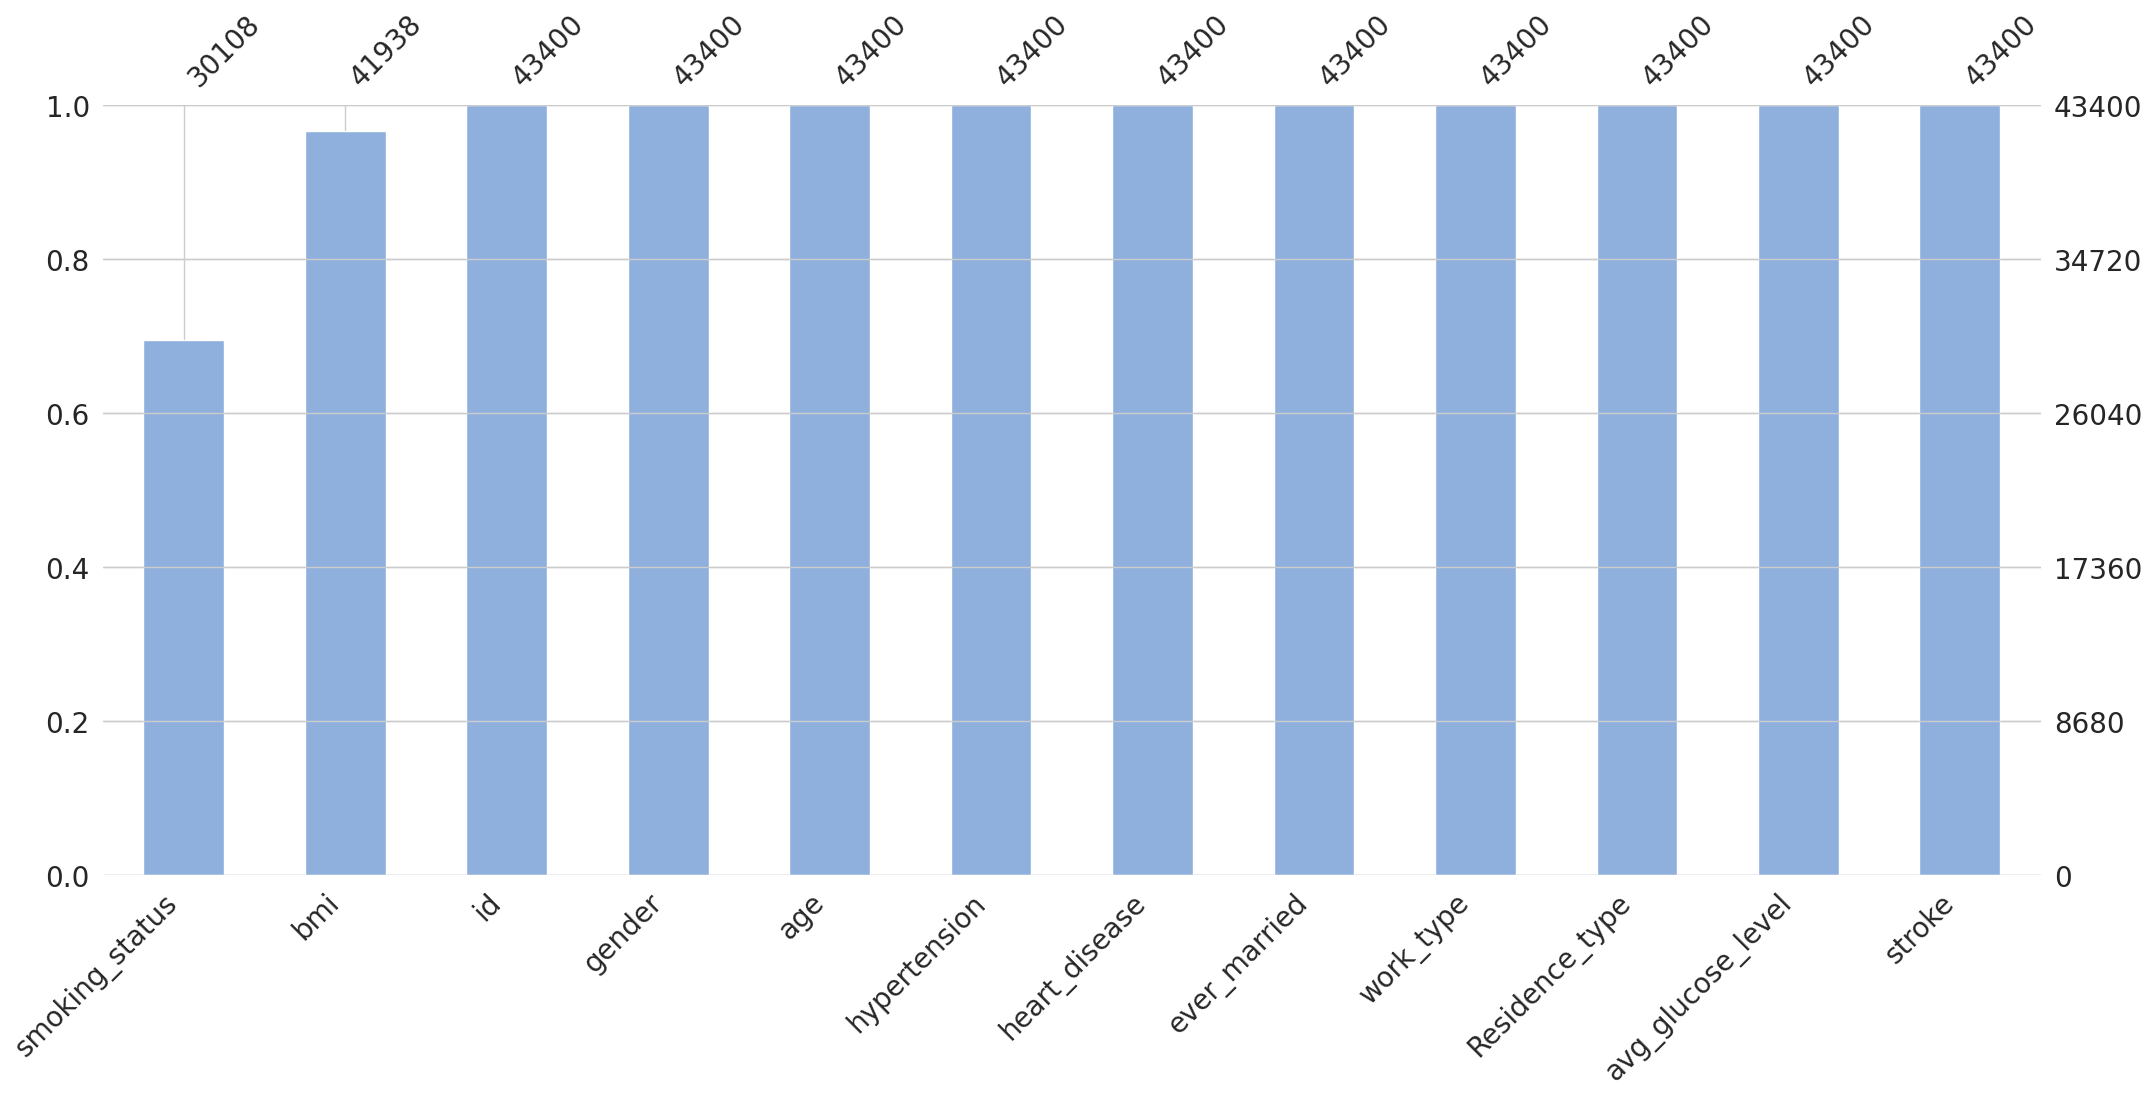

In [ ]:
# Импорт библиотеки missingno для визуализации пропущенных значений в данных
import missingno as msno

# Создание графика столбчатой диаграммы с помощью missingno для визуализации пропущенных значений в DataFrame 'data'
# color="#8FB0DD" устанавливает цвет диаграммы
# sort="ascending" сортирует столбцы по возрастанию, помогая выявить паттерны пропущенных значений
# fontsize=20 устанавливает размер шрифта на диаграмме
msno.bar(data, color="#8FB0DD", sort="ascending", fontsize=20)
# из диаграммы видно что столбцы smoking_status , bmi  имеют значения NaN


In [ ]:
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

## PREPROCESSING

### Delete ID, удаление колонки. так дальше для работы она нам не понадобиться

In [ ]:
# axis='columns' указывает, что мы удаляем столбец, а не строку (axis=1 также может использоваться вместо 'columns')
# inplace=True обозначает, что изменения будут внесены непосредственно в исходный DataFrame
data.drop('id', axis='columns', inplace=True)

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## Чистим Smocking status

In [ ]:
#изменение статуса для пациентов в возрасте младше или 10 лет на 'never smoked'
data.loc[data['age'] <= 10, 'smoking_status'] = 'never smoked'

In [ ]:
# Удаление строк, содержащих отсутствующие  NaN значения в столбце 'smoking_status'
data = data.dropna (subset=['smoking_status'])

In [ ]:
# Подсчет количества отсутствующих значений в столбце 'smoking_status' после удаления.получаем 0
data.smoking_status.isnull().sum()

0

## Очистка данных (сleaning) BMI

In [ ]:
# Выбор числовых признаков (столбцов) в DataFrame 'data' с помощью метода select_dtypes
# include=['int64', 'float64'] указывает, что мы хотим выбрать столбцы с числовыми типами данных
numerical_features = data.select_dtypes(include = ['int64','float64']).columns.values

In [ ]:
# Инициализация объекта KNNImputer для заполнения пропущенных значений с использованием метода ближайших соседей
num_impute=KNNImputer()

In [ ]:
## Обучение KNNImputer на числовых признаках DataFrame 'data'
num_impute.fit(data[numerical_features])


KNNImputer()

In [ ]:
# Заполнение пропущенных значений в числовых признаках DataFrame 'data' с помощью обученного KNNImputer
data[numerical_features]= num_impute.transform(data[numerical_features])

In [ ]:
# Подсчет количества пропущенных значений в столбце 'bmi' после заполнения
data.bmi.isnull().sum()

0

<Axes: >

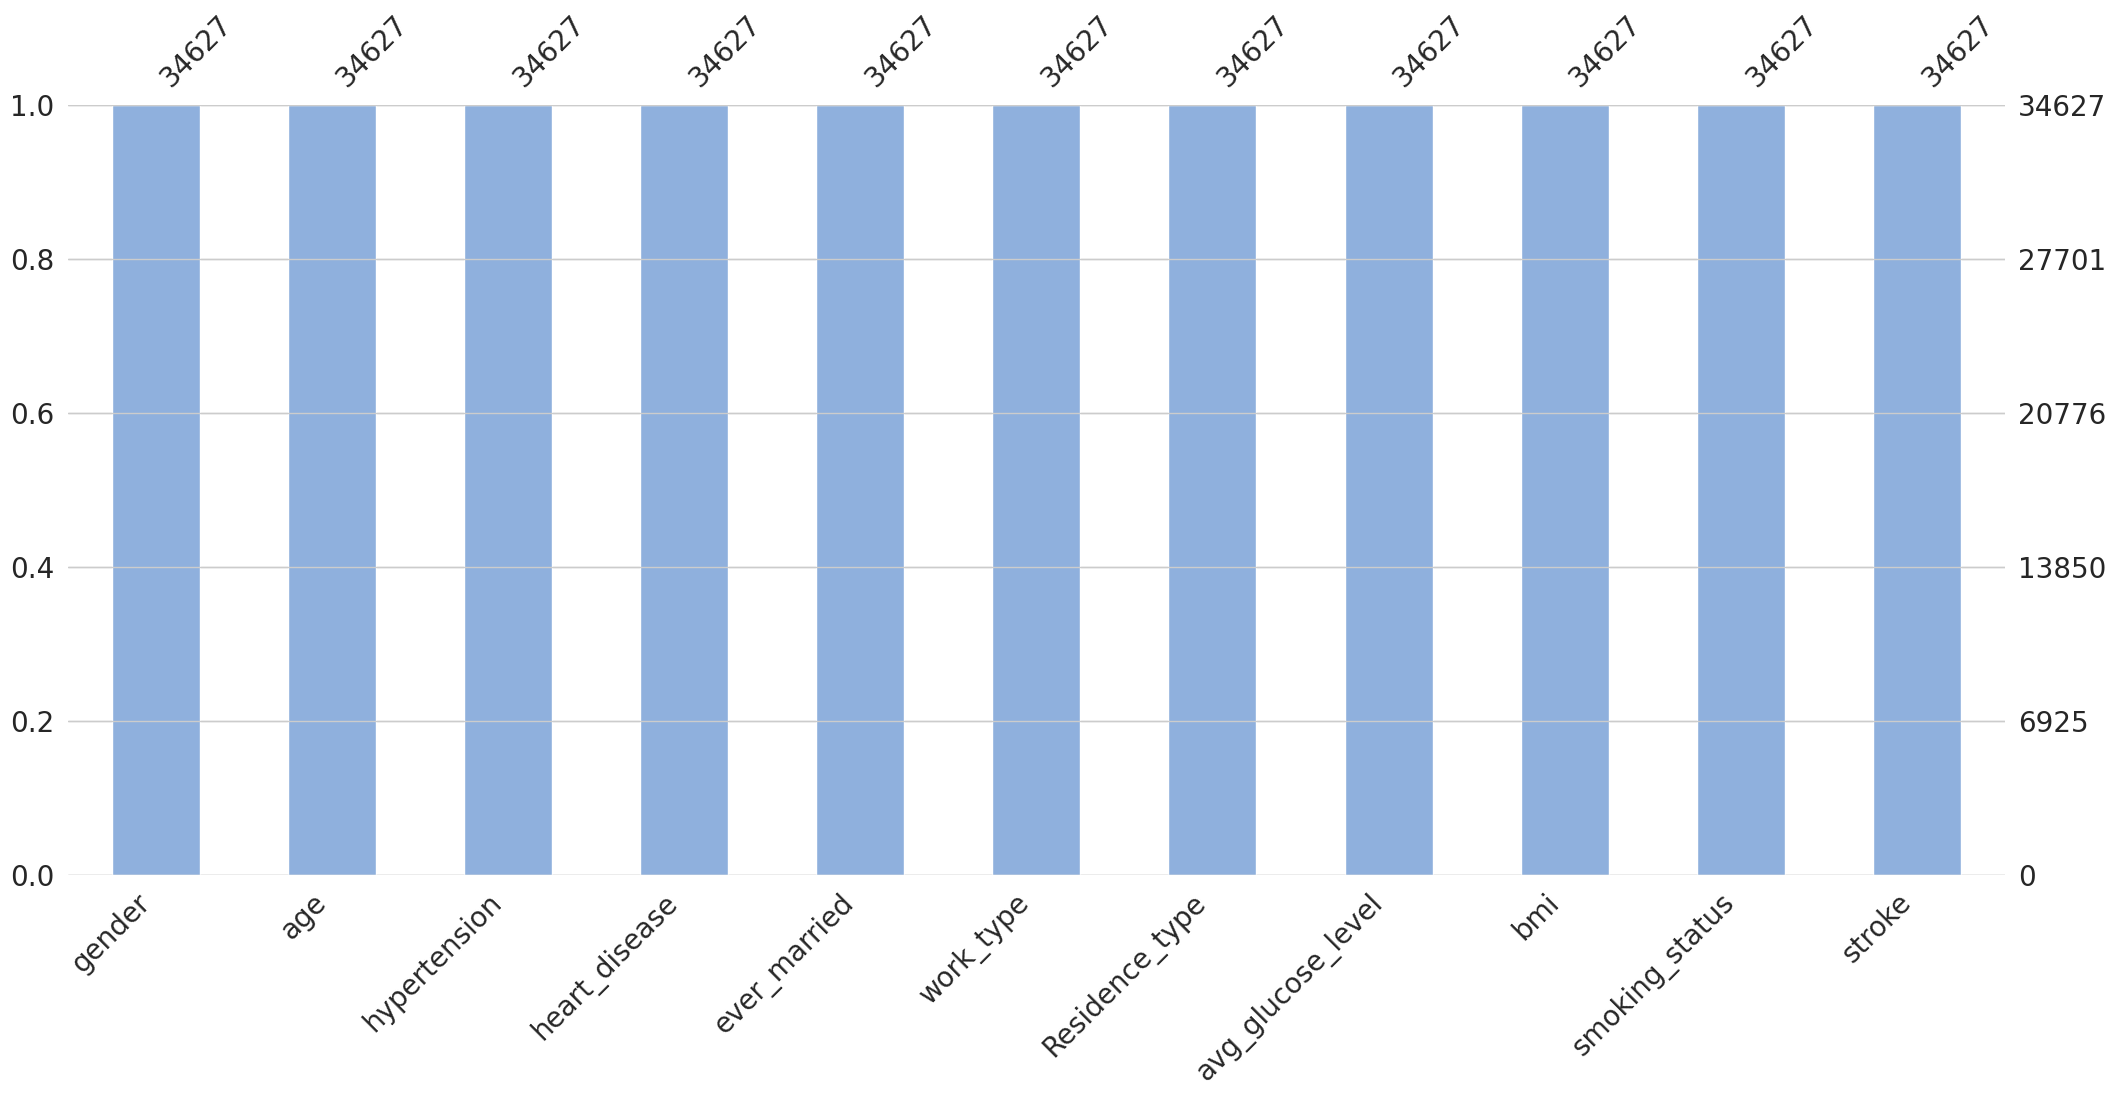

In [ ]:
msno.bar(data, color="#8FB0DD", sort="ascending",  fontsize=20)

### Сохраняем данные без значений NaN

In [ ]:
data.to_csv('first.csv', index=False)

## 0/1 для Residence_type, ever_married, gender

In [ ]:
# Удаление строк, где значение в столбце 'gender' равно 'Other'
data = data.loc[data['gender'] != 'Other']
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:

# Определение функции preprocess для обработки данных
def prerocess(data):
    # Замена значений в столбце 'Residence_type' на числовые: 'Rural' на 0, 'Urban' на 1
    data['Residence_type']= data['Residence_type'].replace({'Rural': 0, 'Urban':1})
    # Замена значений в столбце 'ever_married' на числовые: 'No' на 0, 'Yes' на 1
    data['ever_married']= data['Residence_type'].replace({'No': 0, 'Yes':1})
    # Замена значений в столбце 'gender' на числовые: 'Male' на 0, 'Female' на 1
    data['gender']= data['gender'].replace({'Male': 0, 'Female':1})
    return data
# Применение функции preprocess к DataFrame 'data' для обработки данных
prerocess(data)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0.0,0.0,0,children,0,95.12,18.0,never smoked,0.0
1,0,58.0,1.0,0.0,1,Private,1,87.96,39.2,never smoked,0.0
2,1,8.0,0.0,0.0,1,Private,1,110.89,17.6,never smoked,0.0
3,1,70.0,0.0,0.0,0,Private,0,69.04,35.9,formerly smoked,0.0
6,1,52.0,0.0,0.0,1,Private,1,77.59,17.7,formerly smoked,0.0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0.0,0.0,1,children,1,58.64,20.4,never smoked,0.0
43396,1,56.0,0.0,0.0,1,Govt_job,1,213.61,55.4,formerly smoked,0.0
43397,1,82.0,1.0,0.0,1,Private,1,91.94,28.9,formerly smoked,0.0
43398,0,40.0,0.0,0.0,1,Private,1,99.16,33.2,never smoked,0.0


In [ ]:
# Вывод общей информации о DataFrame 'data' после обработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34618 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             34618 non-null  int64  
 1   age                34618 non-null  float64
 2   hypertension       34618 non-null  float64
 3   heart_disease      34618 non-null  float64
 4   ever_married       34618 non-null  int64  
 5   work_type          34618 non-null  object 
 6   Residence_type     34618 non-null  int64  
 7   avg_glucose_level  34618 non-null  float64
 8   bmi                34618 non-null  float64
 9   smoking_status     34618 non-null  object 
 10  stroke             34618 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 3.2+ MB


## EDA EDA (Exploratory Data Analysis) - Исследовательский анализ данных.

In [ ]:
data_stroke = data[data['stroke']==1]

data_non_stroke = data[data['stroke']==0]

###boxplot (для определения выбросов является частью процесса исследования данных (EDA), который помогает визуализировать и анализировать распределение значений в наборе данных.)


In [ ]:
fig=make_subplots(rows=3,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level', '<i>BMI'))

fig.add_trace(go.Box(y=data_stroke['age'], name='stroke'),row=1,col=1)
fig.add_trace(go.Box(y=data_non_stroke['age'], name='no_stroke'),row=1,col=1)


fig.add_trace(go.Box(y=data_stroke['avg_glucose_level'],name='stroke'),row=2,col=1)
fig.add_trace(go.Box(y=data_non_stroke['avg_glucose_level'],name='no_stroke'),row=2,col=1)

fig.add_trace(go.Box(y=data_stroke['bmi'],name='stroke'),row=3,col=1)
fig.add_trace(go.Box(y=data_non_stroke['bmi'],name='no_stroke'),row=3,col=1)


fig.update_layout(height=1500, width=1000, title_text='<b>Box Plots', font_size=20, showlegend=False)
fig.update_layout(template='plotly_white', title_x=0.5, font_family='Open Sans')
pyo.iplot(fig)

### Удаление выбросов

In [ ]:
# Выводим количество строк до удаления выбросов
print('Количество строк до удаления выбросов:', len(data.index))
# Находим выбросы в возрасте, где возраст <= 14 и индикатор инсульта = 1
outliers_age = data[(data['age'] <= 14) & (data['stroke'] == 1)]
# Отображаем найденные выбросы в возрасте
display(outliers_age)
# Удаляем строки с выбросами в возрасте
data = data.drop(outliers_age.index)

# Находим выбросы в индексе массы тела (BMI), где BMI >= 80
outliers_bmi = data[(data['bmi'] >= 80)]
# Отображаем найденные выбросы в индексе массы тела (BMI)
display(outliers_bmi)

# Удаляем строки с выбросами в индексе массы тела (BMI)
data = data.drop(outliers_bmi.index)
# Выводим количество строк после удаления выбросов
print('number of rows after delete outliers:', len(data.index))

Количество строк до удаления выбросов: 34618


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9961,1,1.32,0.0,0.0,1,children,1,70.37,18.36,never smoked,1.0


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4026,0,38.0,1.0,0.0,0,Private,0,56.90,92.0,never smoked,0.0
10322,0,6.0,0.0,0.0,1,children,1,58.33,96.1,never smoked,0.0
30650,1,34.0,0.0,0.0,1,Private,1,199.13,80.1,never smoked,0.0
34824,1,47.0,1.0,0.0,1,Private,1,238.47,82.7,never smoked,0.0
43087,0,78.0,1.0,0.0,0,Private,0,135.73,89.0,never smoked,0.0


number of rows after delete outliers: 34612


## Исследовательский анализ данных по половому признаку

Этот код создаёт новый DataFrame data_gender, группируя данные по переменной "gender"
и подсчитывая количество наблюдений в каждой группе.
Результат сохраняется в переменную data_gender и выводится на экран для просмотра.

In [ ]:
## Группируем данные по переменной "gender" и считаем количество наблюдений в каждой группе
data_gender = data.groupby(['gender'])['gender'].count().reset_index(name='count')

data_gender

,gender,count
0,0,14056
1,1,20556


In [ ]:
import plotly.express as px

In [ ]:
fig = px.pie(data_gender, names='gender', values='count',height=500, width=900, hole=0.5, title='Распределение по половому признаку: 0-Мужчины, 1-Женщины',
                   color_discrete_sequence=['#FCDCEB', '#8FB0DD'])
fig.update_traces(hovertemplate=None, textposition='outside',
 textinfo='percent+label', rotation=50)
fig.update_layout(margin=dict(t=50, b=35, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=20,
                        text="Половой признак"))


In [ ]:
#Здесь данные data_stroke группируются по столбцу 'gender'.
#Это означает, что данные будут разделены на группы в зависимости от уникальных значений в столбце 'gender'.
#После группировки код считает количество элементов в каждой группе. Это подсчитывает количество записей в каждой группе 'gender'.
# Данный код сбрасывает индекс результата предыдущей операции (groupby и подсчёт) и создаёт новый индекс, начиная с 0.
#Столбец с подсчитанными значениями будет иметь имя 'count'.
data_gender_stroke = data_stroke.groupby(['gender'])['gender'].count().reset_index(name='count')

data_gender_stroke


,gender,count
0,0,278
1,1,361


In [ ]:
# Эта строка фильтрует данные data_stroke для женщин (предполагая, что 1 представляет женский пол в столбце 'gender')
#и считает количество записей.
#female_st будет содержать количество записей о женщинах, полученных после фильтрации.
female_st = data_stroke.loc[data_stroke.gender == 1].count()[0]
#Аналогично первой строке, но здесь фильтруются данные для мужчин (предполагая, что 0 представляет мужской пол в столбце 'gender') и считается количество записей.
#male_st будет содержать количество записей о мужчинах с инсультами, полученных после фильтрации.
male_st = data_stroke.loc[data_stroke.gender == 0].count()[0]

#Эта строка аналогична первой строке, но фильтрует данные data_non_stroke для женщин без инсульта (предполагая, что 1 представляет женский пол в столбце 'gender')
#и считает количество записей.female__no_st будет содержать количество записей о женщинах без инсульта.
female__no_st = data_non_stroke.loc[data_non_stroke.gender == 1].count()[0]

#Аналогично предыдущей строке, но здесь фильтруются данные для мужчин без инсульта (предполагая, что 0 представляет мужской пол в столбце 'gender') и считается количество записей.
#male__no_st будет содержать количество записей о мужчинах без инсульта.
male__no_st = data_non_stroke.loc[data_non_stroke.gender == 0].count()[0]

#Здесь создается DataFrame df_gender, в котором будут отображены четыре категории: женщины с инсультами, мужчины с инсультами, женщины без инсульта, мужчины без инсульта.
#Каждая категория будет содержать количество соответствующих записей.
df_gender = pd.DataFrame({'name': ['Женщины', 'Мужчины'],
                   'STROKE': [female_st, male_st],
                  'NO_STROKE': [female__no_st, male__no_st]})
df_gender

,name,STROKE,NO_STROKE
0,Женщины,361,20198
1,Мужчины,278,13781


In [ ]:
fig = px.bar(df_gender, x="name", y=["STROKE", "NO_STROKE"], title="Гендерное распределение в случаях инсульта и неинсульта", color_discrete_sequence=['#F7435E', '#8FB0DD'])
fig.show()

# Гипертония

In [ ]:
# Подсчет вхождений значений 'гипертония' в наборе данных 'data_stroke', где гипертония равна 1
hypertension_1 = data_stroke.loc[data_stroke.hypertension == 1].count()[0]
# Подсчет вхождений значений 'гипертония' в наборе данных 'data_stroke', где гипертония равна 0
hypertension_0 = data_stroke.loc[data_stroke.hypertension == 0].count()[0]
# Подсчет вхождений значений 'гипертония' в наборе данных 'data_non_stroke', где гипертония равна 1
hypertension1__no_st = data_non_stroke.loc[data_non_stroke.hypertension == 1].count()[0]
# Подсчет вхождений значений 'гипертония' в наборе данных 'data_non_stroke', где гипертония равна 0
hypertension0__no_st = data_non_stroke.loc[data_non_stroke.hypertension == 0].count()[0]
# Создание DataFrame для обобщения количества значений 'гипертония' для случаев инсульта и его отсутствия
df_hypertension = pd.DataFrame({'hypertension': ['гипертоники', 'негипертоников'],
                   'STROKE': [hypertension_1, hypertension_0],
                  'NO_STROKE': [hypertension1__no_st, hypertension0__no_st]})
df_hypertension

,hypertension,STROKE,NO_STROKE
0,гипертоники,177,3352
1,негипертоников,462,30627


In [ ]:
fig = px.bar(df_hypertension, x="hypertension", y=["STROKE", "NO_STROKE"],
             title="Распределение гипертоников и негипертоников в случаях инсульта и неинсульта", color_discrete_sequence=['#F7435E', '#8FB0DD'],
             width=1000, height=700)
fig.show()

## Семейное положение

In [ ]:
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_stroke', где ever_married равен 1
ever_married_1 = data_stroke.loc[data_stroke.ever_married == 1].count()[0]
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_stroke', где ever_married равен 0
ever_married_0 = data_stroke.loc[data_stroke.ever_married == 0].count()[0]
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_non_stroke', где ever_married равен 1
ever_married1__no_st = data_non_stroke.loc[data_non_stroke.ever_married == 1].count()[0]
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_non_stroke', где ever_married равен 0
ever_married0__no_st = data_non_stroke.loc[data_non_stroke.ever_married == 0].count()[0]
# Создание DataFrame для обобщения количества значений 'ever_married' для случаев инсульта и его отсутствия

df_ever_married = pd.DataFrame({'ever_married': ['Женат', 'Холост'],
                   'STROKE': [ever_married_1, ever_married_0],
                  'NO_STROKE': [ever_married1__no_st, ever_married0__no_st]})
fig = px.bar(df_ever_married, x="ever_married", y=["STROKE", "NO_STROKE"],
             title="Распределение по семейному положению в случаях инсульта и неинсульта", color_discrete_sequence=['#F7435E', '#8FB0DD'],
             width=1000, height=800)
fig.show()

## Визуализация инсультников и неинсультников

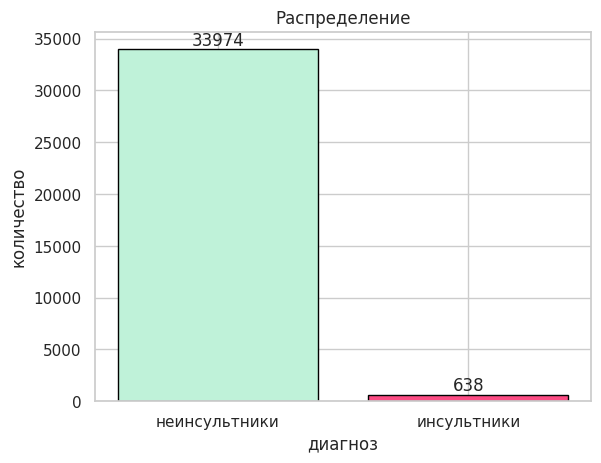

In [ ]:
not_stroke = len(data[data['stroke'] == 0])
stroke = len(data[data['stroke'] == 1])
    # lists creation
y_picture = [not_stroke, stroke]
x_picture = ['неинсультники', 'инсультники']
f = ['#bff2d9', '#fc4c84']
fig = plt.figure()
plt.bar(x_picture, y_picture, label="stroke", color=f, ec='black')  # plotting the graph
plt.xlabel("диагноз")  # create a label for x-axis
plt.ylabel("количество")  # create a label for y-axis
plt.title("Распределение")  # create a title for  graph
    #displaying a digital value above the bar charts
for i in range(len(x_picture)):
    plt.text(i, y_picture[i], y_picture[i], ha="center", va="bottom")
plt.show()

**OneHotEncoding для smoking_status и work_type**

In [ ]:
#Параметр inplace=True заставляет Pandas менять текущий датафрейм, а не создавать новый. data.rename (columns= {'name': 'Name'}, inplace= True) Переименование колонки.
data = pd.concat([data, pd.get_dummies(data['smoking_status'])], axis=1)
data.drop(['smoking_status'], axis=1, inplace=True)
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work')], axis=1)
data.drop(['work_type'], axis=1, inplace=True)
data = data.astype(int)
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0,3,0,0,0,0,95,18,0,0,1,0,0,0,0,0,1
1,0,58,1,0,1,1,87,39,0,0,1,0,0,0,1,0,0
2,1,8,0,0,1,1,110,17,0,0,1,0,0,0,1,0,0
3,1,70,0,0,0,0,69,35,0,1,0,0,0,0,1,0,0
6,1,52,0,0,1,1,77,17,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10,0,0,1,1,58,20,0,0,1,0,0,0,0,0,1
43396,1,56,0,0,1,1,213,55,0,1,0,0,1,0,0,0,0
43397,1,82,1,0,1,1,91,28,0,1,0,0,0,0,1,0,0
43398,0,40,0,0,1,1,99,33,0,0,1,0,0,0,1,0,0


In [ ]:
data.to_csv('second.csv', index=False)